In [426]:
# Imports
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


In [427]:
# Load datasets
media_contacts = pd.read_csv("../data/media_contacts.csv")
socio_demos = pd.read_csv("../data/socio_demos.csv")

# Initial data overview, cleaning and feature engineering

## 1. Media Contacts Dataset

Let's start with a quick overview.

In [428]:
media_contacts.head(10)

,PERSON ID,TV_Total,FLYERS,Print_Total,Online_Video,Online_Display,Online Total,TikTok,YouTube_Total,YouTube_Mobile,YouTube_Desktop,YouTube_Tablet,YouTube CTV,Pinterest,Purchase
0,5326201,0.0,0.0,0.0,10.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,256895,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1
2,7894945,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
3,797459,0.0,0.0,0.0,11.0,2.0,13.0,0.0,1.0,1.0,0.0,0.0,0.0,25.0,1
4,5529182,0.0,0.0,0.0,7.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,17687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,62098432,4.0,0.0,0.0,6.0,5.0,11.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
7,56489362,3.0,0.0,0.0,9.0,6.0,15.0,0.0,2.0,0.0,0.0,2.0,0.0,3.0,1
8,275140,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,666280698,81.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [429]:
# Check column types and missing values
media_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PERSON ID        15854 non-null  int64  
 1   TV_Total         15854 non-null  float64
 2   FLYERS           15854 non-null  float64
 3   Print_Total      15854 non-null  float64
 4   Online_Video     15853 non-null  float64
 5   Online_Display   15852 non-null  float64
 6   Online Total     15853 non-null  float64
 7   TikTok           15850 non-null  float64
 8   YouTube_Total    15851 non-null  float64
 9   YouTube_Mobile   15852 non-null  float64
 10  YouTube_Desktop  15853 non-null  float64
 11  YouTube_Tablet   15851 non-null  float64
 12  YouTube CTV      15853 non-null  float64
 13  Pinterest        15854 non-null  float64
 14  Purchase         15854 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 1.8 MB


In [430]:
# Get basic stats on numerical columns
media_contacts.describe()

,PERSON ID,TV_Total,FLYERS,Print_Total,Online_Video,Online_Display,Online Total,TikTok,YouTube_Total,YouTube_Mobile,YouTube_Desktop,YouTube_Tablet,YouTube CTV,Pinterest,Purchase
count,1.585400e+04,15854.000000,15854.000000,15854.000000,15853.000000,15852.000000,15853.000000,15850.000000,15851.000000,15852.000000,15853.000000,15851.000000,15853.000000,15854.000000,15854.000000
mean,9.363038e+07,5.736344,0.424877,0.690677,0.191446,0.087055,0.278496,0.046498,0.558766,0.305577,0.068378,0.059870,0.124897,0.669610,0.495080
std,2.185159e+08,9.990565,0.971493,1.692449,1.013844,0.686021,1.371722,0.458838,1.283823,0.989943,0.377071,0.393334,0.571348,3.351949,0.499992
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.410050e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.586395e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.665581e+07,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.988330e+08,113.000000,3.000000,23.000000,18.000000,13.000000,24.000000,9.000000,14.000000,14.000000,8.000000,12.000000,12.000000,63.000000,1.000000


In [431]:
# Count missing values
media_contacts.isnull().sum()

PERSON ID          0
TV_Total           0
FLYERS             0
Print_Total        0
Online_Video       1
Online_Display     2
Online Total       1
TikTok             4
YouTube_Total      3
YouTube_Mobile     2
YouTube_Desktop    1
YouTube_Tablet     3
YouTube CTV        1
Pinterest          0
Purchase           0
dtype: int64

- Column names are oncosistent and will require a bit of cleaning
- All column values are numeric. Scaling would be useful when training models.
- There is a small amount of blanks that need to be dealt with. I will set them all to 0 which in this dataset will mean no exposure.

In [432]:
# Checking that all Purchase values are consistent
print(media_contacts["Purchase"].unique())

[1 0]


Quick look at the various YouTube features and their correlation to each other.

In [433]:
# youtube_cols = ["YouTube_Total", "YouTube_Mobile", "YouTube_Desktop", "YouTube_Tablet", "YouTube_CTV"]
# sns.heatmap(media_contacts[youtube_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("YouTube Exposure Correlation Heatmap")
# plt.show()

In [434]:
# print(media_contacts["PERSON_ID"].duplicated().sum())

In [435]:
# media_contacts["PERSON_ID"].duplicated().sum()

In [436]:
# Cleaning column names
media_contacts = media_contacts.rename(columns=lambda x: x.strip().replace(" ", "_"))  # Remove spaces from column names and force uppercase

In [437]:
# Fill missing values in media_contacts with 0 (no exposure)
media_contacts.fillna(0, inplace=True)

In [438]:
# Final check
media_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PERSON_ID        15854 non-null  int64  
 1   TV_Total         15854 non-null  float64
 2   FLYERS           15854 non-null  float64
 3   Print_Total      15854 non-null  float64
 4   Online_Video     15854 non-null  float64
 5   Online_Display   15854 non-null  float64
 6   Online_Total     15854 non-null  float64
 7   TikTok           15854 non-null  float64
 8   YouTube_Total    15854 non-null  float64
 9   YouTube_Mobile   15854 non-null  float64
 10  YouTube_Desktop  15854 non-null  float64
 11  YouTube_Tablet   15854 non-null  float64
 12  YouTube_CTV      15854 non-null  float64
 13  Pinterest        15854 non-null  float64
 14  Purchase         15854 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 1.8 MB


In [439]:
# Identify duplicate rows
duplicates = media_contacts.duplicated()

In [440]:
# Print the duplicate rows
media_contacts[duplicates]

,PERSON_ID,TV_Total,FLYERS,Print_Total,Online_Video,Online_Display,Online_Total,TikTok,YouTube_Total,YouTube_Mobile,YouTube_Desktop,YouTube_Tablet,YouTube_CTV,Pinterest,Purchase
4386,9152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5886,7926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7871,2821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10906,1261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
11007,818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
12545,37402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
13598,2447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## 2. Socio Demos Dataset

Quick overview:

In [441]:
socio_demos.head(10)

,Person ID,weight,BIRTHDAY,Gender,Number_of children,People_in_Household
0,5326201,11032.10,19971001.0,male,0,2-HH
1,256895,2581.77,19730701.0,female,0,2-HH
2,7894945,8219.48,19870201.0,male,1 child,3-HH
3,797459,6040.79,19870401.0,male,2 Children,4-HH
4,5529182,11635.16,19971001.0,male,0,2-HH
5,17687,13456.38,19980401.0,female,0,2-HH
6,62098432,3881.71,19870201.0,female,0,1 -HH (female)
7,56489362,3993.45,19730501.0,female,0,2-HH
8,275140,6353.90,19341201.0,male,0,1-HH (male)
9,666280698,2966.01,19560501.0,male,0,2-HH


In [442]:
socio_demos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Person ID            15854 non-null  int64  
 1   weight               15854 non-null  object 
 2   BIRTHDAY             15850 non-null  float64
 3   Gender               15851 non-null  object 
 4   Number_of children   15852 non-null  object 
 5   People_in_Household  15851 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 743.3+ KB


In [443]:
socio_demos.isnull().sum()

Person ID              0
weight                 0
BIRTHDAY               4
Gender                 3
Number_of children     2
People_in_Household    3
dtype: int64

- Much like Media Contacts, column names need to be cleaned up;
- Few blanks that need to be dealt with;
- Most columns are categorical and need a more detailed look. Values seem inconsistent and will need cleaning;

In [444]:
# Cleaning column names
socio_demos = socio_demos.rename(columns=lambda x: x.strip().replace(" ", "_"))

In [445]:
# Identify duplicate rows
duplicates = socio_demos.duplicated()

In [446]:
# Print the duplicate rows
print(socio_demos[duplicates])

Empty DataFrame
Columns: [Person_ID, weight, BIRTHDAY, Gender, Number_of_children, People_in_Household]
Index: []


In [447]:
socio_demos["Person_ID"].duplicated().sum()

np.int64(97)

### 2.1 Weight

In [448]:
print(socio_demos["weight"].unique()[:20]) 

['11032.10' '2581.77' '8219.48' '6040.79' '11635.16' '13456.38' '3881.71'
 '3993.45' '6353.90' '2966.01' '4532.89' '5642.40' '1694.22' '3733.55'
 '3497.05' '5246.94' '#NULL!' '5083.80' '6843.12' '6020.17']


In [449]:
# Find non-numeric entries
non_numeric_weights = socio_demos[~socio_demos["weight"].str.replace(".", "", regex=False).str.isnumeric()]
print(non_numeric_weights["weight"].unique())

['#NULL!']


Weight is coming up as an object due to the presence of "#NULL". This needs to be converted to numeric and nulls can be filled using the median. I prefer median as it uses values that are present in the dataset already. Since the null values are very few, this should not skew the dataset significantly.

In [450]:
# Convert weight to numeric
socio_demos["weight"] = pd.to_numeric(socio_demos["weight"], errors="coerce")

In [451]:
# Fill missing 'weight' values using median (since weight distribution may be skewed)
socio_demos["weight"] = socio_demos["weight"].fillna(socio_demos["weight"].median())

### 2.2 Birthday
Will need to convert this to Age to make it more useable with Age Group being a good human-friendly solution.

In [452]:
# Creating Age
socio_demos['Age'] = 2025 - pd.to_datetime(socio_demos['BIRTHDAY'], format='%Y%m%d').dt.year

# Fill missing 'Age' values using median
socio_demos["Age"] = socio_demos["Age"].fillna(socio_demos["Age"].median())

# Drop BIRTHDAY column
socio_demos.drop(columns=["BIRTHDAY"], inplace=True)

### Age Group

Age Group would be quite useful for further research. I had to experiment with the buckets a bit. The data favors older people with younger account for a much smaller proportion of the observations which is why the first bucket is doubled. The dataset was collected from people 18 and up so no under 18 bucket.

In [453]:
# Creating Age Group
socio_demos['Age_Group'] = pd.cut(socio_demos['Age'], bins=[17, 34, 44, 54, 64, 74, 120], 
                           labels=['18-34', '35-44', '45-54', '55-64', '65-74', '75+'])

# Check the results
socio_demos["Age_Group"].value_counts(dropna=False)

Age_Group
55-64    3977
65-74    3358
45-54    2741
75+      2607
35-44    2162
18-34    1009
Name: count, dtype: int64

### 2.3 Gender

In [454]:
socio_demos["Gender"].value_counts(dropna=False)

Gender
male      8330
female    7521
NaN          3
Name: count, dtype: int64

Column looks good and only thing needed is to fill the NaN. "Unknown" should be a suitable value.

In [455]:
socio_demos["Gender"] = socio_demos["Gender"].fillna("Unknown")

### 2.4 Number of Children

In [456]:
print(socio_demos["Number_of_children"].unique())

['0' '1 child' '2 Children' '3 Kinder' nan]


Column is messy but numbers can be easily pulled to make values consistent.

In [457]:
# Convert categorical children column to numeric
socio_demos['Number_of_children'] = socio_demos['Number_of_children'].replace({'0': 0, '1 child': 1, '2 Children': 2, '3 Kinder': 3})

# Fill missing values using median
socio_demos["Number_of_children"] = socio_demos["Number_of_children"].fillna(socio_demos["Number_of_children"].median())

C:\Users\ksbon\AppData\Local\Temp\ipykernel_15336\4159418054.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  socio_demos['Number_of_children'] = socio_demos['Number_of_children'].replace({'0': 0, '1 child': 1, '2 Children': 2, '3 Kinder': 3})


### 2.5 People in Household

In [458]:
socio_demos["People_in_Household"].value_counts(dropna=False)

People_in_Household
2-HH              6848
1 -HH (female)    2546
1-HH (male)       2368
3-HH              2021
4-HH              1528
5-HH               420
6-HH                92
7-HH                24
NaN                  3
8-HH                 2
10-HH                1
9-HH                 1
Name: count, dtype: int64

Another messy one but can be converted to numeric just like Number of Children. The gender aspect present in some of the values can be ignjored as we already have a separate gender column.

In [459]:
# Extract the first numeric value from the string and convert to integer
socio_demos["Household_Size"] = socio_demos["People_in_Household"].str.extract(r'(\d+)').astype(float)

# Fill missing values using median
socio_demos["Household_Size"] = socio_demos["Household_Size"].fillna(socio_demos["Household_Size"].median())

# Drop the original column
socio_demos.drop(columns=["People_in_Household"], inplace=True)

In [460]:
socio_demos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Person_ID           15854 non-null  int64   
 1   weight              15854 non-null  float64 
 2   Gender              15854 non-null  object  
 3   Number_of_children  15854 non-null  float64 
 4   Age                 15854 non-null  float64 
 5   Age_Group           15854 non-null  category
 6   Household_Size      15854 non-null  float64 
dtypes: category(1), float64(4), int64(1), object(1)
memory usage: 759.0+ KB


## 3. Merging Datasets
Let's now merge the two datasets using the provided IDs.

In [461]:
# Merge datasets
data = pd.merge(media_contacts, socio_demos, left_on="PERSON_ID", right_on="Person_ID", how="inner")

# Drop IDs as they are no longer needed
data.drop(columns=["PERSON_ID", "Person_ID"], inplace=True)

In [462]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16048 entries, 0 to 16047
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   TV_Total            16048 non-null  float64 
 1   FLYERS              16048 non-null  float64 
 2   Print_Total         16048 non-null  float64 
 3   Online_Video        16048 non-null  float64 
 4   Online_Display      16048 non-null  float64 
 5   Online_Total        16048 non-null  float64 
 6   TikTok              16048 non-null  float64 
 7   YouTube_Total       16048 non-null  float64 
 8   YouTube_Mobile      16048 non-null  float64 
 9   YouTube_Desktop     16048 non-null  float64 
 10  YouTube_Tablet      16048 non-null  float64 
 11  YouTube_CTV         16048 non-null  float64 
 12  Pinterest           16048 non-null  float64 
 13  Purchase            16048 non-null  int64   
 14  weight              16048 non-null  float64 
 15  Gender              16048 non-null  

In [463]:
data.describe()

,TV_Total,FLYERS,Print_Total,Online_Video,Online_Display,Online_Total,TikTok,YouTube_Total,YouTube_Mobile,YouTube_Desktop,YouTube_Tablet,YouTube_CTV,Pinterest,Purchase,weight,Number_of_children,Age,Household_Size
count,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000,16048.000000
mean,5.731493,0.424850,0.689369,0.191426,0.087114,0.278539,0.047420,0.560257,0.306705,0.068420,0.059571,0.125561,0.672856,0.495950,5125.119982,0.084746,58.730808,2.121635
std,9.966786,0.971372,1.687651,1.012046,0.685571,1.369052,0.466682,1.287871,0.991847,0.378989,0.391619,0.577620,3.365729,0.499999,4758.618092,0.332748,15.417848,1.090489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,718.050000,0.000000,18.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2718.800000,0.000000,47.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3961.460000,0.000000,60.000000,2.000000
75%,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5719.180000,0.000000,70.000000,3.000000
max,113.000000,3.000000,23.000000,18.000000,13.000000,24.000000,9.000000,14.000000,14.000000,8.000000,12.000000,12.000000,63.000000,1.000000,76258.290000,3.000000,101.000000,10.000000


In [464]:
data.isnull().sum()

TV_Total              0
FLYERS                0
Print_Total           0
Online_Video          0
Online_Display        0
Online_Total          0
TikTok                0
YouTube_Total         0
YouTube_Mobile        0
YouTube_Desktop       0
YouTube_Tablet        0
YouTube_CTV           0
Pinterest             0
Purchase              0
weight                0
Gender                0
Number_of_children    0
Age                   0
Age_Group             0
Household_Size        0
dtype: int64

### Additional feature engineering

In [465]:
media_channels = ['TV_Total', 'Print_Total', 'Online_Video', 'Online_Display', 'YouTube_Total', 'TikTok']
data['Total_Media_Exposure'] = data[media_channels].sum(axis=1)

### Save Clean Dataset

In [466]:
# Saving dataset for future use
# from src.utils import save_dataframe

def save_dataframe(df, filename="file.csv", directory="..\data", sep=",", index=False):
    """
    Saves a Pandas dataframe to a CSV file.

    Parameters:
    df (pd.DataFrame): Dataset to save.
    filename (str): The name of the output CSV file (default: 'file.csv').
    directory (str): The folder where the file should be saved (default: '../data').
    sep (str): The separator for the CSV file (default: ',').
    index (bool): Whether to include the index in the saved file (default: False).
    
    Returns:
    None
    """
    try:
        # Ensure the directory exists
        os.makedirs(directory, exist_ok=True)

        # Full file path
        filepath = os.path.join(directory, filename)

        # Save DataFrame
        df.to_csv(filepath, sep=sep, index=index)
        print(f"✅ Data successfully saved to {filepath} with separator '{sep}'")
    
    except Exception as e:
        print(f"❌ Error saving file: {e}")


save_dataframe(data, "clean_dataset.csv")

✅ Data successfully saved to ..\data\clean_dataset.csv with separator ','


## 4. Data analysis

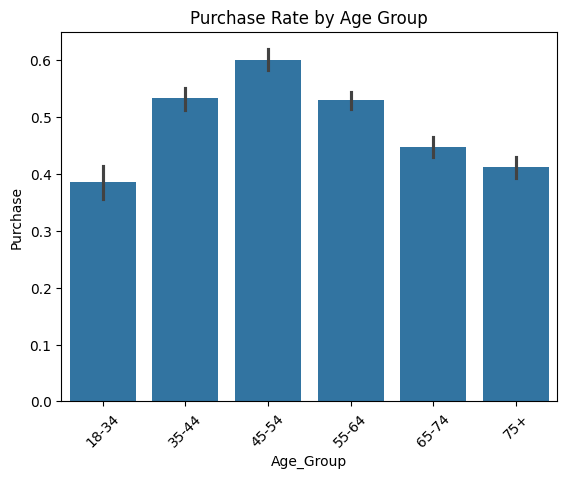

In [467]:
# Plot purchase rate by age group
sns.barplot(x='Age_Group', y='Purchase', data=data, estimator=lambda x: sum(x)/len(x))
plt.title("Purchase Rate by Age Group")
plt.xticks(rotation=45)
plt.show()


In [468]:
# # Manually compute weighted purchase rate per age group
# weighted_purchase = (
#     data.groupby("Age_Group").apply(lambda g: np.average(g["Purchase"], weights=g["weight"]))
# ).reset_index(name="Weighted_Purchase_Rate")

# # Now plot using the precomputed values
# sns.barplot(x="Age_Group", y="Weighted_Purchase_Rate", data=weighted_purchase)
# plt.title("Weighted Purchase Rate by Age Group")
# plt.xticks(rotation=45)
# plt.show()

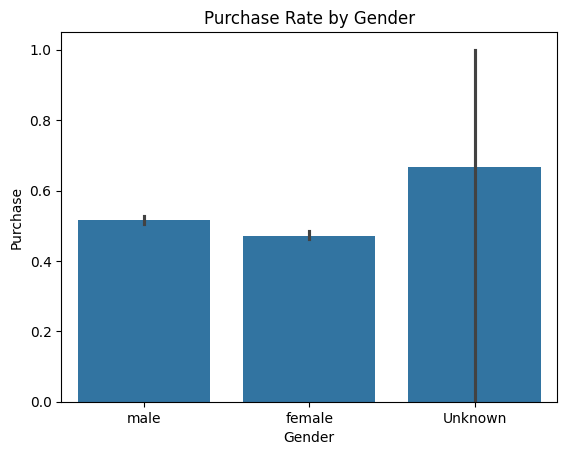

In [469]:
sns.barplot(x='Gender', y='Purchase', data=data, estimator=lambda x: sum(x)/len(x))
plt.title("Purchase Rate by Gender")
plt.show()

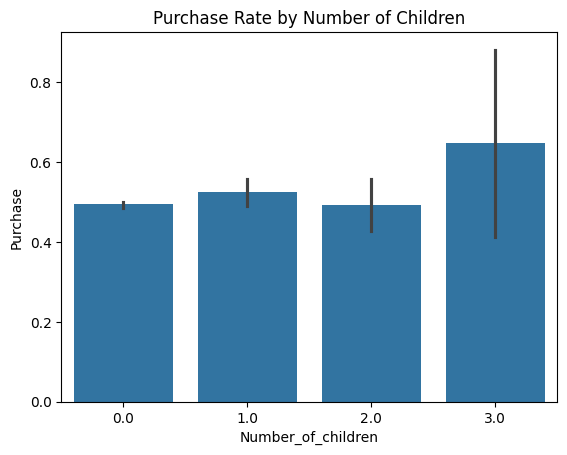

In [470]:
sns.barplot(x='Number_of_children', y='Purchase', data=data, estimator=lambda x: sum(x)/len(x))
plt.title("Purchase Rate by Number of Children")
plt.show()


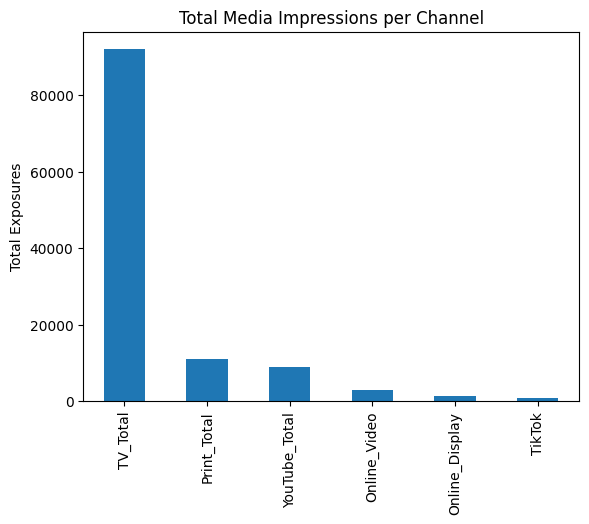

In [471]:
media_channels = ['TV_Total', 'Print_Total', 'Online_Video', 'Online_Display', 'YouTube_Total', 'TikTok']

# Sum exposure per channel
media_exposure = data[media_channels].sum().sort_values(ascending=False)

# Plot media exposure
media_exposure.plot(kind='bar')
plt.title("Total Media Impressions per Channel")
plt.ylabel("Total Exposures")
plt.show()


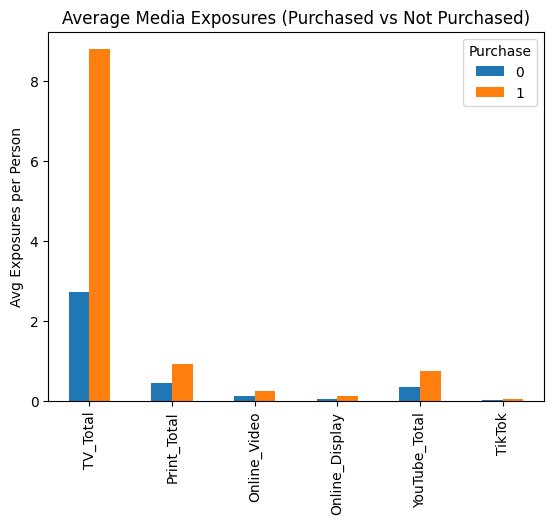

In [472]:
# Calculate average exposure for purchasers vs non-purchasers
purchase_by_channel = data.groupby('Purchase')[media_channels].mean().T
purchase_by_channel.plot(kind='bar')
plt.title("Average Media Exposures (Purchased vs Not Purchased)")
plt.ylabel("Avg Exposures per Person")
plt.show()


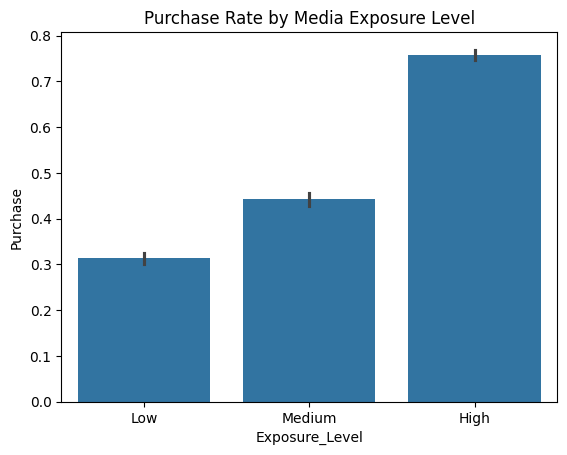

In [473]:
# data['Total_Media_Exposure'] = data[media_channels].sum(axis=1)

# Bin people into Low, Medium, and High media exposure
data['Exposure_Level'] = pd.qcut(data['Total_Media_Exposure'], q=3, labels=['Low', 'Medium', 'High'])

sns.barplot(x='Exposure_Level', y='Purchase', data=data, estimator=lambda x: sum(x)/len(x))
plt.title("Purchase Rate by Media Exposure Level")
plt.show()

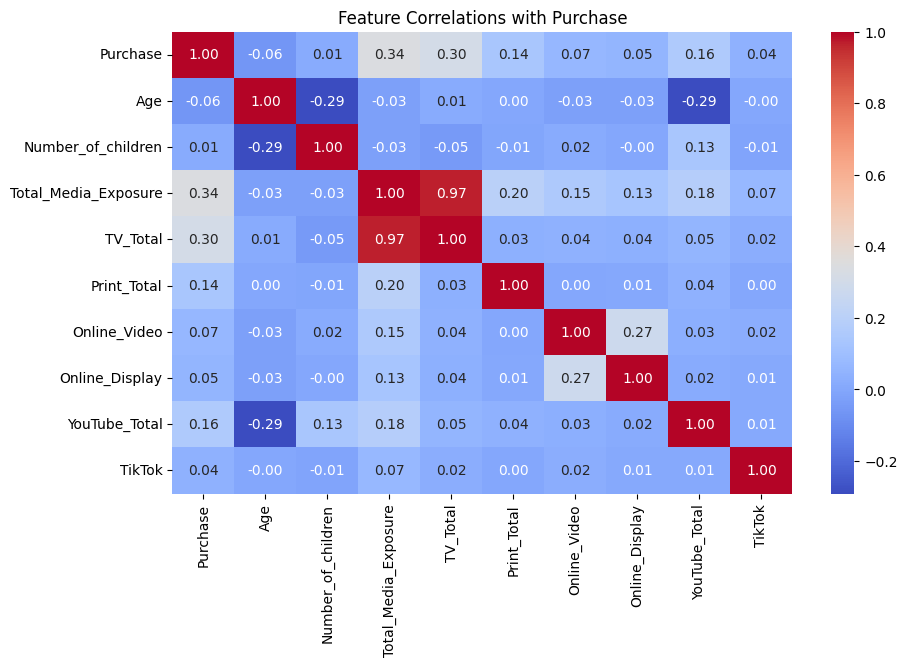

In [474]:
corr = data[['Purchase', 'Age', 'Number_of_children', 'Total_Media_Exposure'] + media_channels].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations with Purchase")
plt.show()

In [475]:
purchase_rate_by_age = data.groupby("Age")["Purchase"].mean()
purchase_rate_by_gender = data.groupby("Gender")["Purchase"].mean()
purchase_rate_by_household = data.groupby("Household_Size")["Purchase"].mean()

In [476]:
purchase_rate_by_age

Age
18.0     0.130435
19.0     0.071429
20.0     0.341463
21.0     0.288889
22.0     0.229167
           ...   
97.0     0.500000
98.0     0.333333
99.0     0.000000
100.0    0.000000
101.0    0.000000
Name: Purchase, Length: 84, dtype: float64

In [477]:
purchase_rate_by_gender

Gender
Unknown    0.666667
female     0.472025
male       0.517495
Name: Purchase, dtype: float64

In [478]:
purchase_rate_by_household

Household_Size
1.0     0.493874
2.0     0.483922
3.0     0.515924
4.0     0.515524
5.0     0.544601
6.0     0.500000
7.0     0.560000
8.0     0.500000
9.0     1.000000
10.0    0.000000
Name: Purchase, dtype: float64

In [479]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16048 entries, 0 to 16047
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   TV_Total              16048 non-null  float64 
 1   FLYERS                16048 non-null  float64 
 2   Print_Total           16048 non-null  float64 
 3   Online_Video          16048 non-null  float64 
 4   Online_Display        16048 non-null  float64 
 5   Online_Total          16048 non-null  float64 
 6   TikTok                16048 non-null  float64 
 7   YouTube_Total         16048 non-null  float64 
 8   YouTube_Mobile        16048 non-null  float64 
 9   YouTube_Desktop       16048 non-null  float64 
 10  YouTube_Tablet        16048 non-null  float64 
 11  YouTube_CTV           16048 non-null  float64 
 12  Pinterest             16048 non-null  float64 
 13  Purchase              16048 non-null  int64   
 14  weight                16048 non-null  float64 
 15  Ge

In [480]:
data.head(20)

,TV_Total,FLYERS,Print_Total,Online_Video,Online_Display,Online_Total,TikTok,YouTube_Total,YouTube_Mobile,YouTube_Desktop,...,Pinterest,Purchase,weight,Gender,Number_of_children,Age,Age_Group,Household_Size,Total_Media_Exposure,Exposure_Level
0,0.0,0.0,0.0,10.0,4.0,14.0,0.0,0.0,0.0,0.0,...,0.0,1,11032.10,male,0.0,28.0,18-34,2.0,14.0,High
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,...,0.0,1,2581.77,female,0.0,52.0,45-54,2.0,3.0,Medium
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1,8219.48,male,1.0,38.0,35-44,3.0,5.0,Medium
3,0.0,0.0,0.0,11.0,2.0,13.0,0.0,1.0,1.0,0.0,...,25.0,1,6040.79,male,2.0,38.0,35-44,4.0,14.0,High
4,0.0,0.0,0.0,7.0,3.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0,11635.16,male,0.0,28.0,18-34,2.0,10.0,High
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,13456.38,female,0.0,27.0,18-34,2.0,0.0,Low
6,4.0,0.0,0.0,6.0,5.0,11.0,0.0,1.0,1.0,0.0,...,0.0,1,3881.71,female,0.0,38.0,35-44,1.0,16.0,High
7,3.0,0.0,0.0,9.0,6.0,15.0,0.0,2.0,0.0,0.0,...,3.0,1,3993.45,female,0.0,52.0,45-54,2.0,20.0,High
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,6353.90,male,0.0,91.0,75+,1.0,1.0,Low
9,81.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2966.01,male,0.0,69.0,65-74,2.0,82.0,High


In [481]:
# Listing Numerical columns
cols = data.columns
num_cols = list(data.select_dtypes('number'))
print(num_cols)

['TV_Total', 'FLYERS', 'Print_Total', 'Online_Video', 'Online_Display', 'Online_Total', 'TikTok', 'YouTube_Total', 'YouTube_Mobile', 'YouTube_Desktop', 'YouTube_Tablet', 'YouTube_CTV', 'Pinterest', 'Purchase', 'weight', 'Number_of_children', 'Age', 'Household_Size', 'Total_Media_Exposure']


In [482]:
# Listing Categorical columns
cat_cols = list(set(cols) - set(num_cols))
print(cat_cols)

['Age_Group', 'Gender', 'Exposure_Level']


In [483]:
# Separating the numeric and categorical columns as each will require a separate approach
df_numeric = data[num_cols]
df_categorical = data[cat_cols]

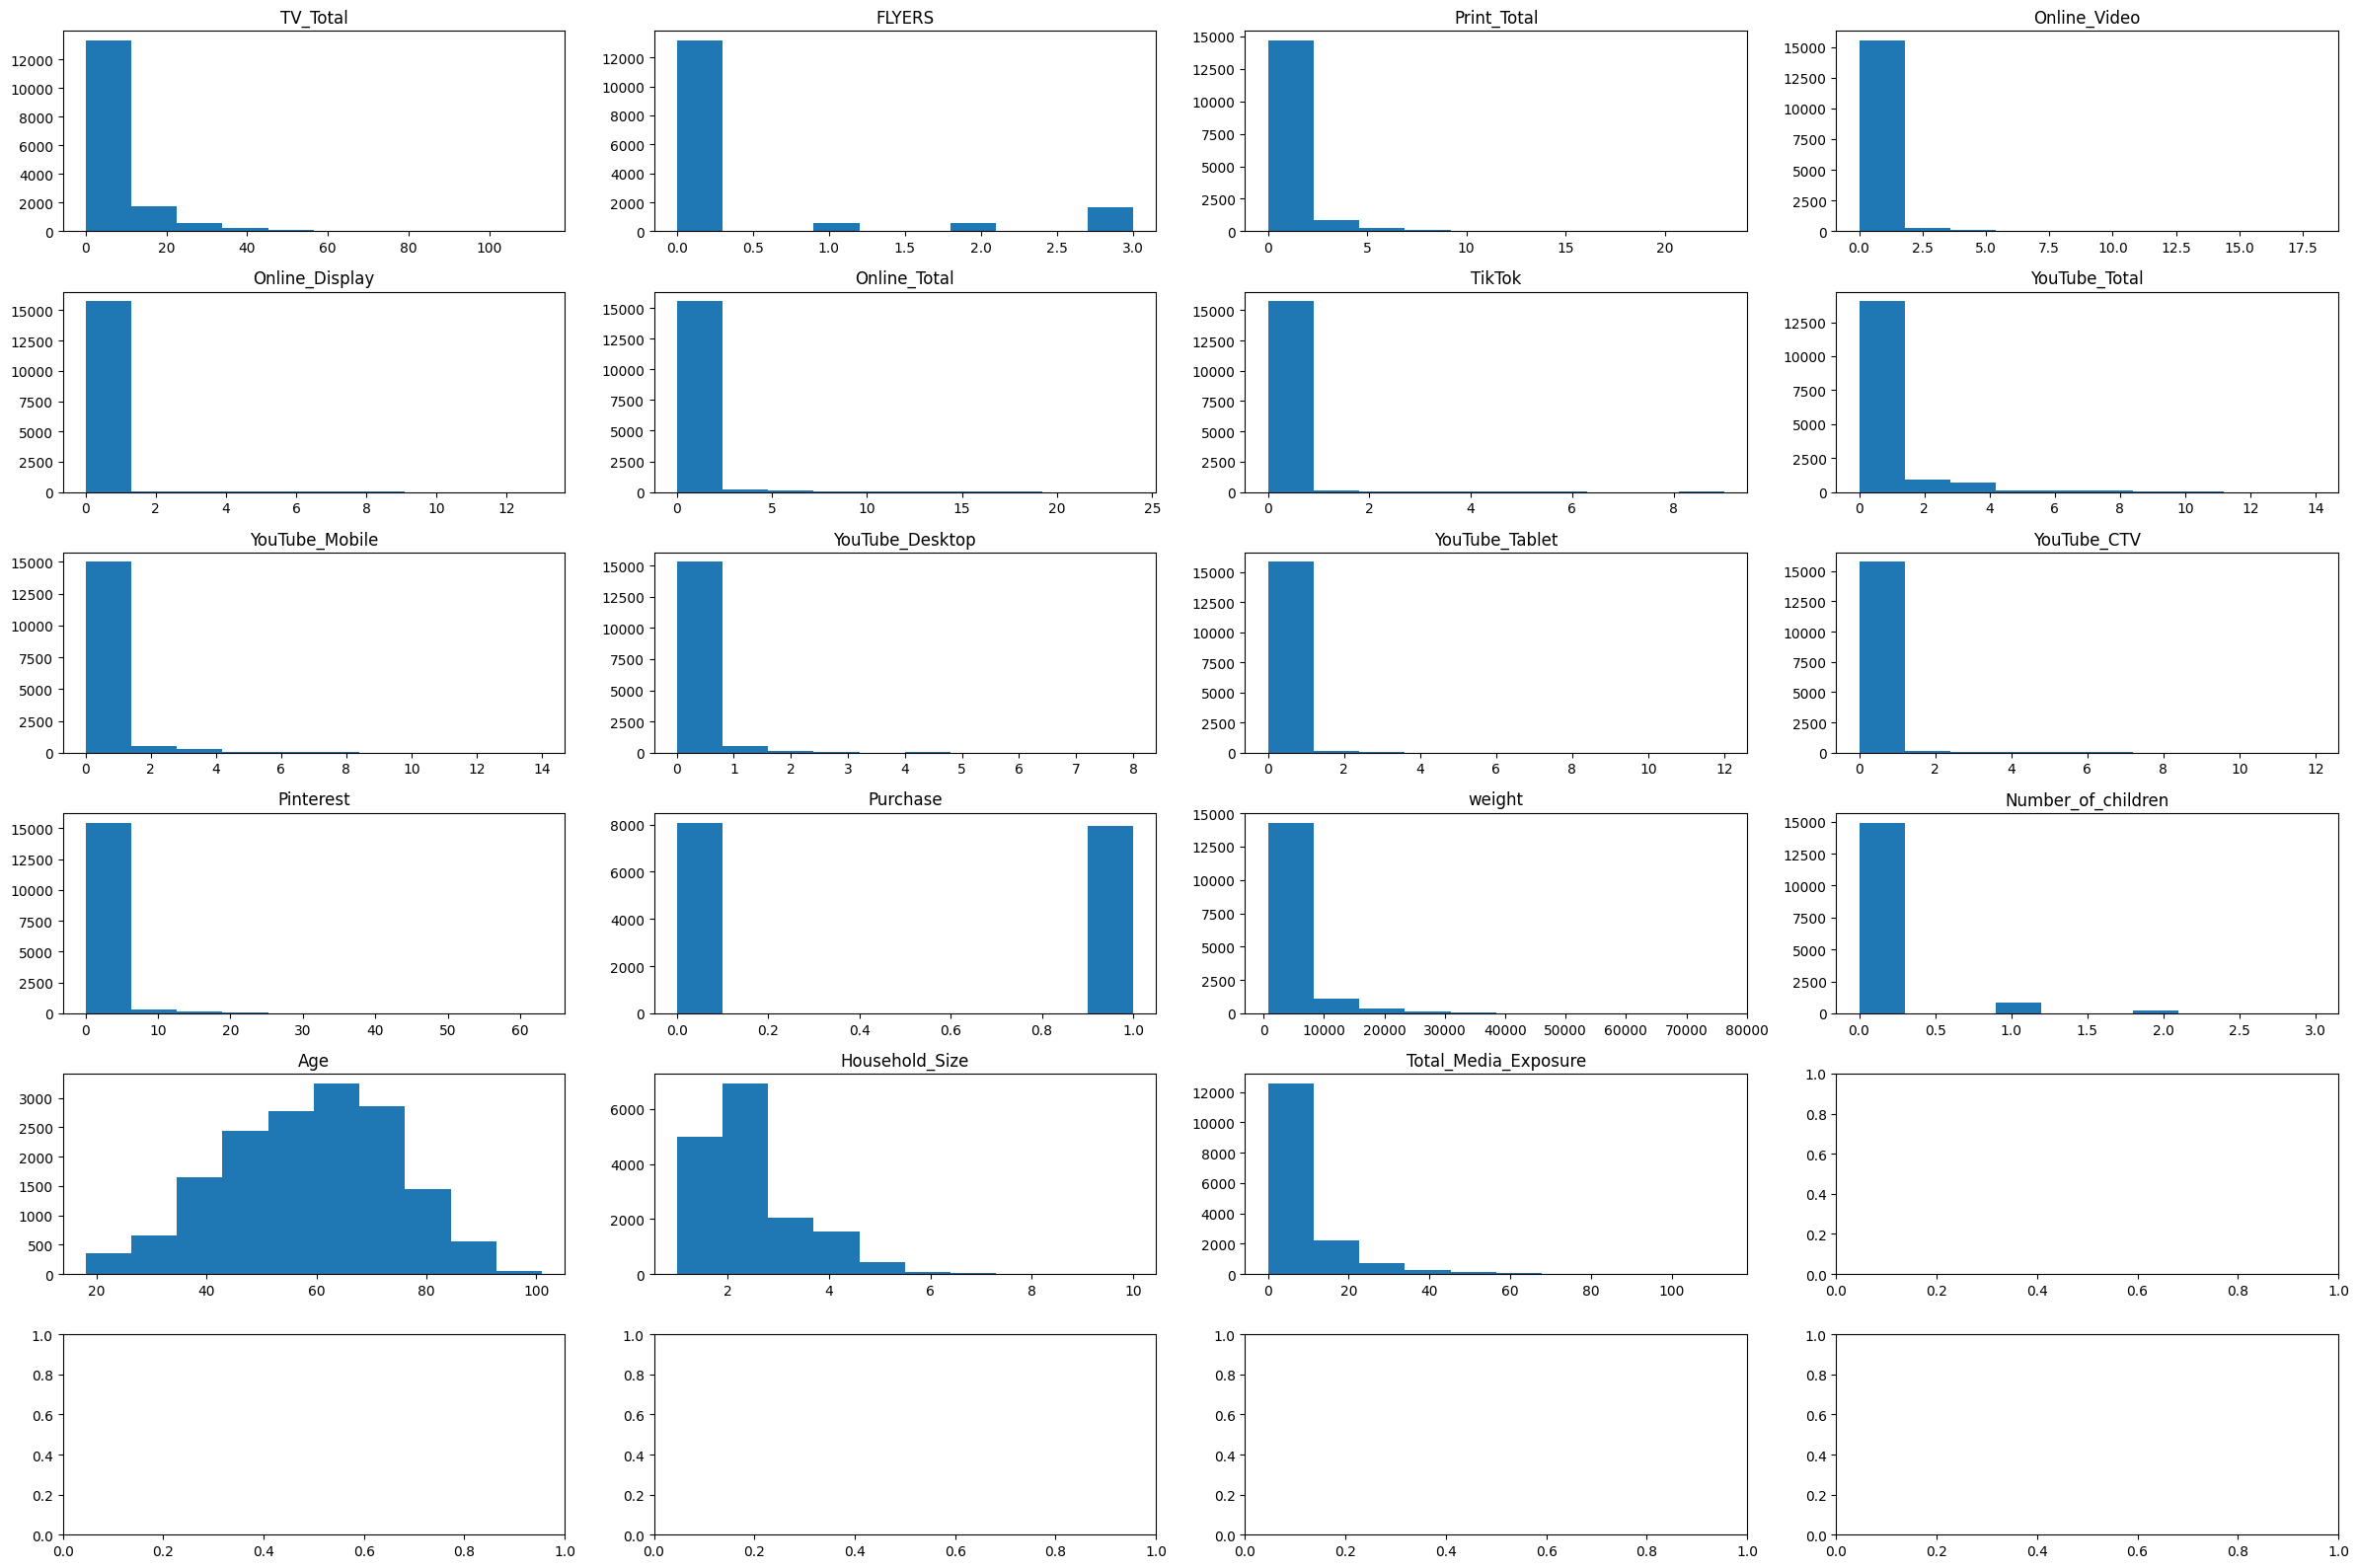

In [484]:
# Creating a grid of subplots for the numeric columns
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(24, 16))
axes = axes.flatten()  # Flatten 2D array to 1D

# Plot each histogram in a subplot
for i, col in enumerate(df_numeric.columns):
    plt.sca(axes[i])
    plt.hist(df_numeric[col])
    plt.title(col)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# TO-DO

- Figure out the duplicates thing
- Figure out the weights